# Amazon Sales Dataset Analysis

## Analisis Eksploratif Produk Amazon: Hubungan antara Diskon, Harga, dan Rating Pelanggan

### Latar Belakang

Marketplace seperti Amazon memiliki ribuan produk dengan variasi harga, diskon, dan rating pelanggan.
Analisis ini bertujuan untuk memahami bagaimana hubungan antara faktor-faktor tersebut dapat memengaruhi popularitas dan kualitas produk dari sisi pelanggan.

### Rumusan Masalah

- Apakah diskon yang tinggi berpengaruh terhadap rating produk?

- Apakah harga produk berkorelasi dengan penilaian pelanggan?

- Kategori produk mana yang memiliki rating tertinggi dan paling populer berdasarkan jumlah review?

- Strategi apa yang dapat diterapkan untuk meningkatkan performa produk dengan rating rendah?

### Data Understanding

Sumber Data: Kaggle – Amazon Product Dataset
Jumlah Data: 1465 baris × 16 kolom

#### Fitur Utama:

product_name → Nama produk

category → Kategori produk

discount_percentage → Persentase diskon

actual_price → Harga asli

rating → Rating produk

rating_count → Jumlah orang yang memberikan rating

review_content → Ulasan pelanggan

In [6]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from src.cleaning import clean_prices, clean_ratings, split_main_category


In [7]:
df = pd.read_csv('../data/raw/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [8]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [9]:
df["review_title"].nunique

<bound method IndexOpsMixin.nunique of 0       Satisfied,Charging is really fast,Value for mo...
1       A Good Braided Cable for Your Type C Device,Go...
2       Good speed for earlier versions,Good Product,W...
3       Good product,Good one,Nice,Really nice product...
4       As good as original,Decent,Good one for second...
                              ...                        
1460    Received the product without spanner,Excellent...
1461    ok,everything was good couldn't return bcoz I ...
1462    very good,Work but front melt after 2 month,Go...
1463    Fan Speed is slow,Good quality,Good product,go...
1464    Works perfect,Ok good product,Nice Product. Re...
Name: review_title, Length: 1465, dtype: object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Data Cleaning

#### Langkah yang dilakukan:

Menghapus baris kosong (NaN) pada kolom penting.

Mengubah tipe data:

rating → float

rating_count → int (hapus tanda koma ,)

discount_percentage, actual_price, discounted_price → float

Menangani nilai anomali seperti | atau simbol lainnya.

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [12]:
#benerin persen dan rp nya si price

# hapus simbol ₹ dan % lalu ubah ke float
df = clean_prices(df)
df = clean_ratings(df)
df = split_main_category(df)


In [13]:
#cek duplikatnya

df.duplicated().sum()

#df = df.drop_duplicates()

0

In [14]:
df['main_category'].value_counts().head(10)

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [15]:
df.select_dtypes(include='object').columns

Index(['product_id', 'product_name', 'category', 'about_product', 'user_id',
       'user_name', 'review_id', 'review_title', 'review_content', 'img_link',
       'product_link', 'main_category'],
      dtype='object')

In [16]:
df.to_csv("..\data/cleaned/amazon_cleaned.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


## EDA

### Analisa Produk

In [17]:
df["product_name"].value_counts()

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                           5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                    4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                  3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                              3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                     3
                                                                             

Distribusi produk sangat long-tail: 80% produk hanya memiliki 1 review.
Oleh karena itu, analisis EDA yang paling stabil dilakukan pada level kategori.

### Analisa Harga

#### Distribusi Harga Setelah Diskon

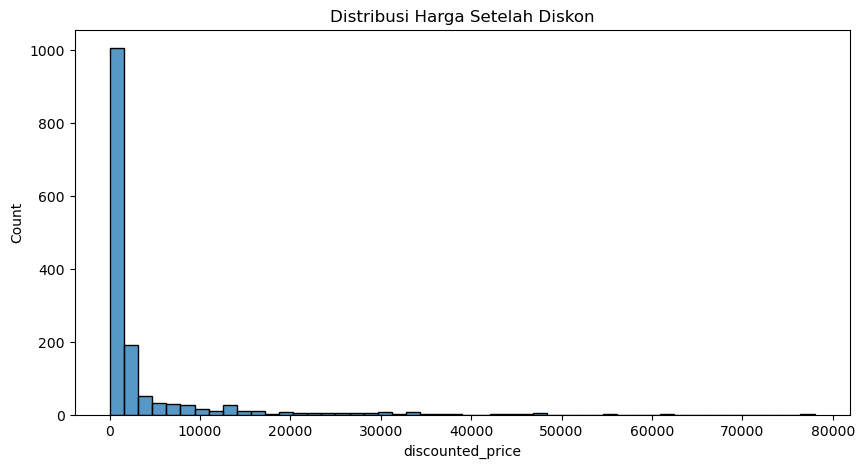

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df["discounted_price"], bins=50)
plt.title("Distribusi Harga Setelah Diskon")
plt.show()

#### Selisih Harga Asli dan Setelah Diskon

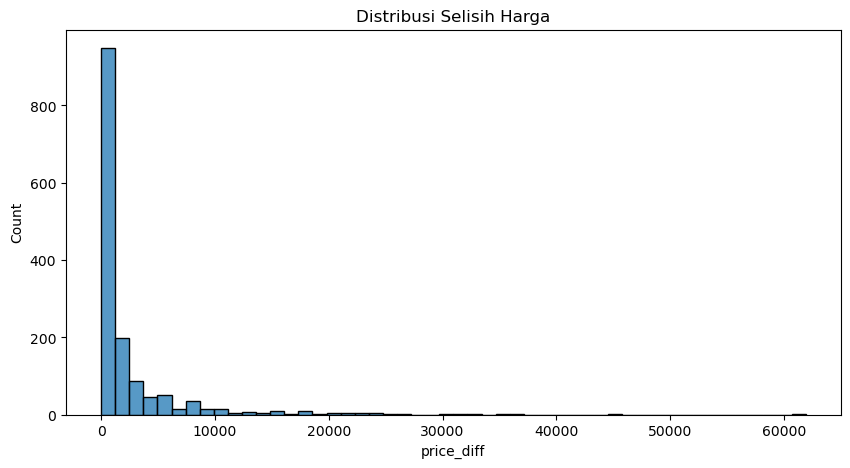

In [19]:
df["price_diff"] = df["actual_price"] - df["discounted_price"]

plt.figure(figsize=(10,5))
sns.histplot(df["price_diff"], bins=50)
plt.title("Distribusi Selisih Harga")
plt.show()


### Analisa Rating
#### Distribusi Rating

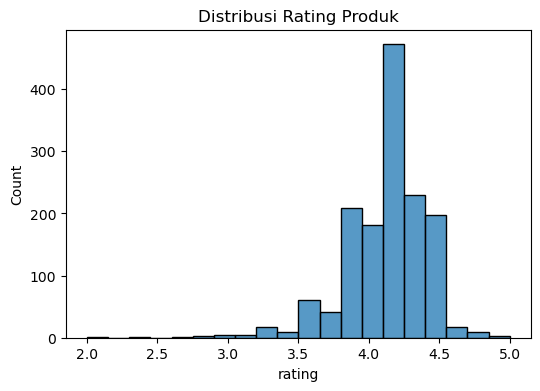

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["rating"], bins=20)
plt.title("Distribusi Rating Produk")
plt.show()


#### Distribusi Jumlah Rating

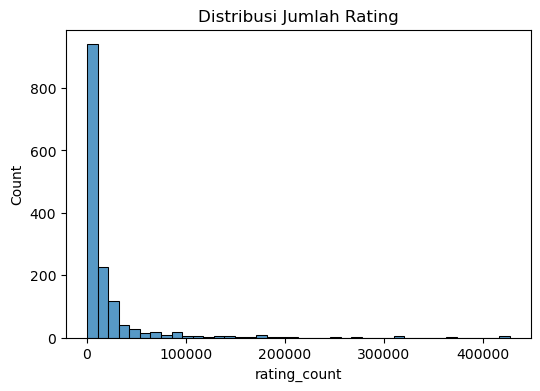

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df["rating_count"], bins=40)
plt.title("Distribusi Jumlah Rating")
plt.show()


### Analisa Kategori
#### Distribusi kategori

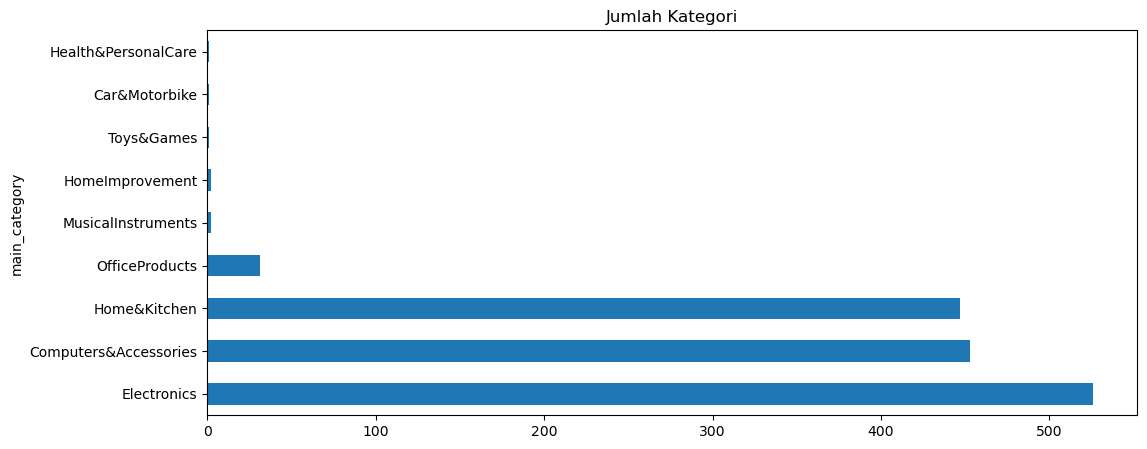

In [22]:
df["main_category"].value_counts().plot(kind="barh", figsize=(12,5))
plt.title("Jumlah Kategori")
plt.show()

#### Top 5 Kategori Terjual

In [23]:
top5_cat = df["main_category"].value_counts().head(5)
top5_cat

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
Name: count, dtype: int64

### Eksplorasi Kategori Produk vs Rating

In [24]:
df['main_category'].value_counts().head(10)

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

##### Kategori dengan rating tertinggi?

In [25]:
rating_by_cat=df.groupby('main_category')['rating'].mean().sort_values(ascending=False).head()
rating_by_cat

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64

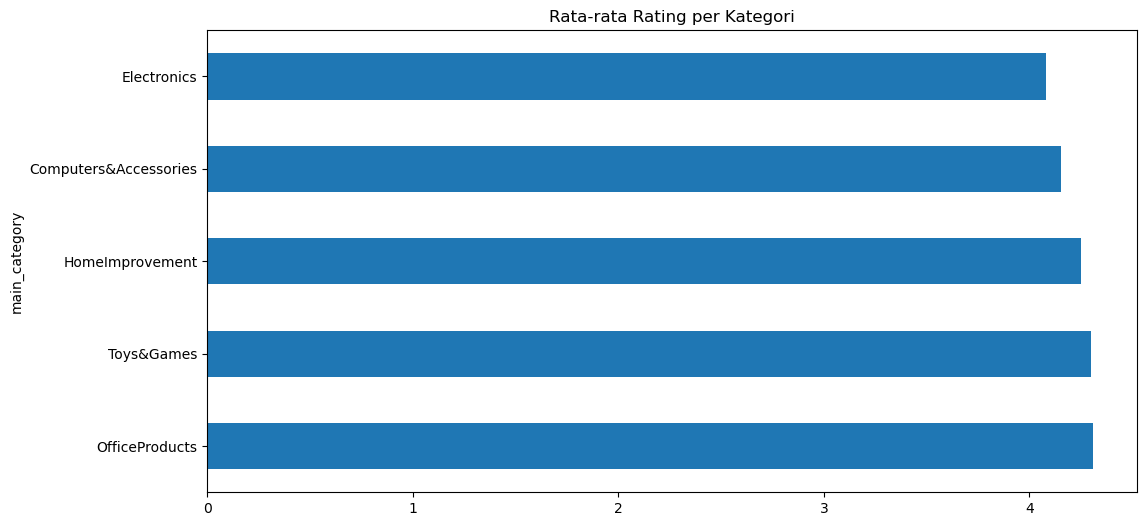

In [26]:
plt.figure(figsize=(12,6))
rating_by_cat.plot(kind="barh")
plt.title("Rata-rata Rating per Kategori")
plt.show()

##### Kategori populer dengan jumlah rating terbanyak?

In [27]:
jumlahrating_by_cat = df.groupby('main_category')['rating_count'].sum().sort_values(ascending=False).head()
jumlahrating_by_cat

main_category
Electronics              15778848.0
Computers&Accessories     7728689.0
Home&Kitchen              2990077.0
OfficeProducts             149675.0
MusicalInstruments          88882.0
Name: rating_count, dtype: float64

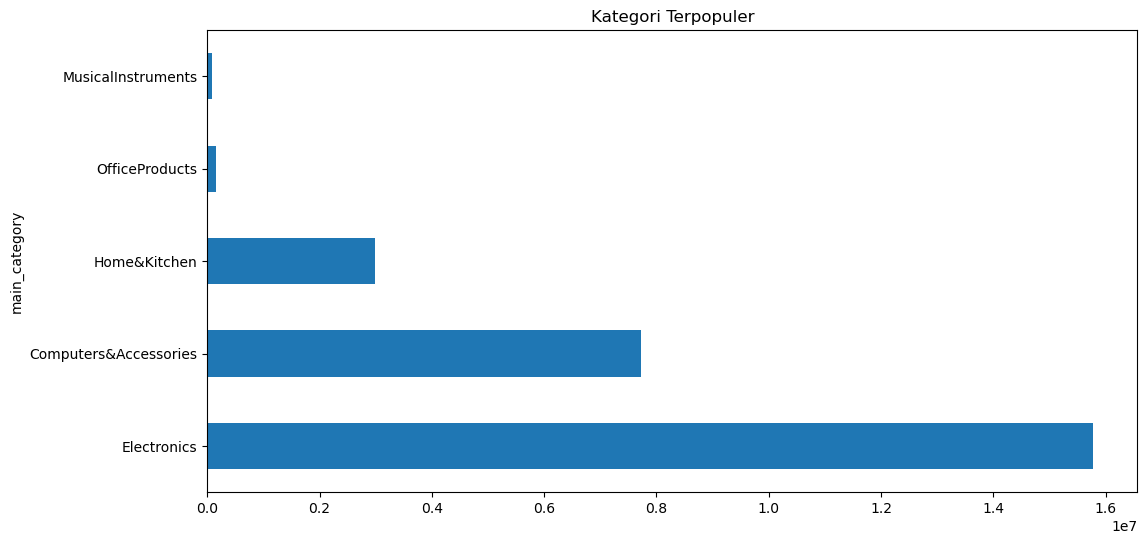

In [28]:
plt.figure(figsize=(12,6))
jumlahrating_by_cat.plot(kind="barh")
plt.title("Kategori Terpopuler")
plt.show()

- Electronis dan ComputersAccessoris menjadi kategori terpopuler dengan ulasan terbanyak namun tidak selaras dengan rating tinggi
- OfficeProducts dan ToysnGames memiliki rating tinggi namun tidak begitu populer.

## Korelasi antar kolom

In [29]:
dfcor=df[['actual_price', 
              'discounted_price', 
              'discount_percentage',
              'rating', 
              'rating_count']]

In [33]:
cormetrix = dfcor.corr()
cormetrix

,actual_price,discounted_price,discount_percentage,rating,rating_count
actual_price,1.000000,0.961919,-0.118459,0.121642,-0.036215
discounted_price,0.961919,1.000000,-0.242740,0.120337,-0.027304
discount_percentage,-0.118459,-0.242740,1.000000,-0.155375,0.011294
rating,0.121642,0.120337,-0.155375,1.000000,0.102235
rating_count,-0.036215,-0.027304,0.011294,0.102235,1.000000


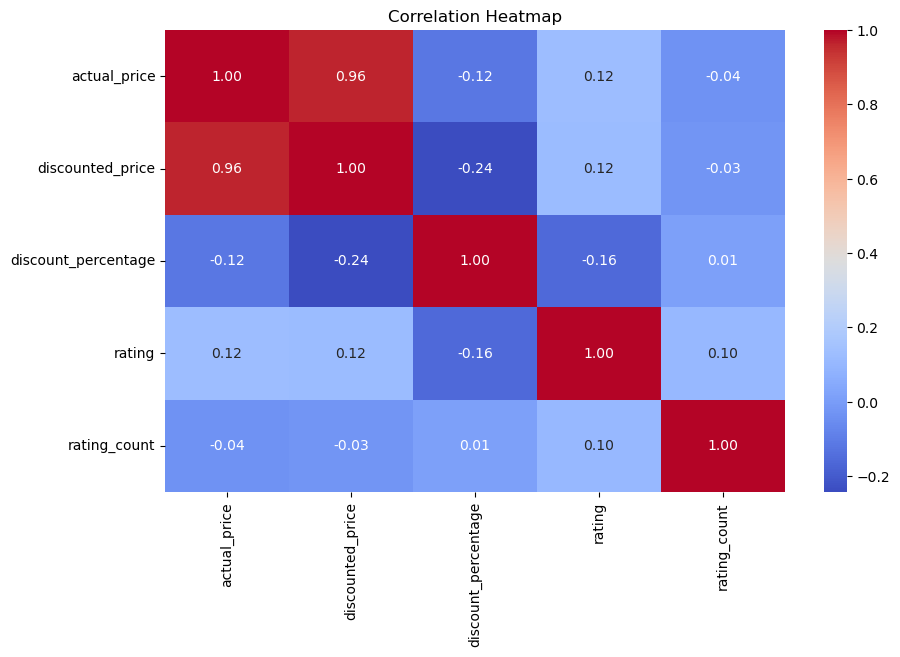

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(cormetrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Analisa rating count vs rating

Hasil korelasi menunjukkan hubungan lemah namun positif.

### Analisa Discount Percentage vs Rating

#### adakah hubungan rating dengan tingginya discount percentage?

tidak ada hubungan kuat antara diskon dan rating.

### Analisa Discount Percentage vs Rating Count

Haisl korelasi diskon vs jumlah rating menunjukkan hubungan sangat lemah namun positif.

### Analisa Discount Percentage vs Rating

Hasil korelasi positif tapi lemah

### Catatan 
- Electronics populer tapi rating ga setinggi ekspektasi
memungkinkan faktor pengiriman, pelayanan, ekspektasi tinggi terhadap brand besar, atau variasi produk yang luas.

- Office Products punya rating tinggi tapi kurang populer
memungkinkan strategi bundling atau promosi kolaboratif. misal bundling alat tulis premium dengan diskon kecil tapi menarik.

- Fokus strategi
Electronics punya volume besar (artinya peluang profit tinggi), maka memperbaiki kualitas & persepsi pelanggan di kategori ini akan berdampak signifikan buat bisnis.

Karena tidak ada korelasi antara diskon prosentasi dengan rating, maka untuk produk yang difokuskan karena populer dan rating tinggi dapat dilakukan promosi bundling.

## Kesimpulan eda saat ini adalah diskon tidak cukup meningkatkan kepercayaan pelannggan pada produk tertentu, sebaliknya faktor produksi dan pelayanan mungkin dapat ditingkatkan untuk kepercayaan/rating pelanggan